# Heart Disease Prediction using Machine Learning 🫀🤖

## Introduction
This project uses machine learning to predict whether a patient has heart disease based on several clinical features. 
The dataset contains information such as age, sex, blood pressure, cholesterol levels, and more. 
By training multiple ML models, including Random Forest, we can provide a **preliminary diagnosis** for new patients using just a CSV or Excel file.

The main goals of this project are:
- Demonstrate a complete ML workflow: data loading, exploration, preprocessing, training, evaluation, and prediction.
- Make the model **user-friendly**: the user can upload a patient file and get a diagnosis immediately.
- Provide insights into which features are most correlated with heart disease.

## Features / Dataset Columns
The model uses the following columns from the dataset:

- `age` – Age of the patient  
- `sex` – Gender (0 = female, 1 = male)  
- `cp` – Chest pain type  
- `trestbps` – Resting blood pressure  
- `chol` – Serum cholesterol  
- `fbs` – Fasting blood sugar  
- `restecg` – Resting electrocardiographic results  
- `thalach` – Maximum heart rate achieved  
- `exang` – Exercise induced angina  
- `oldpeak` – ST depression induce


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

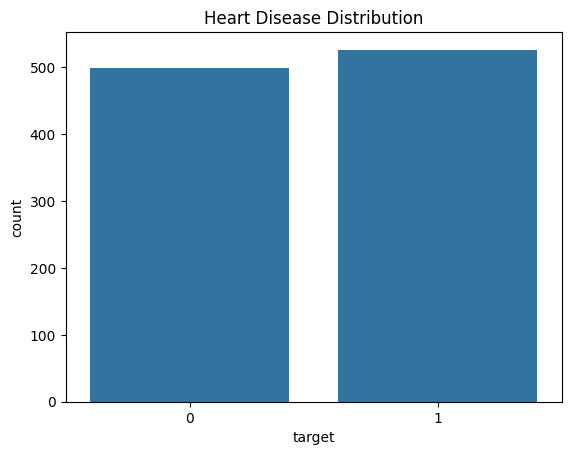

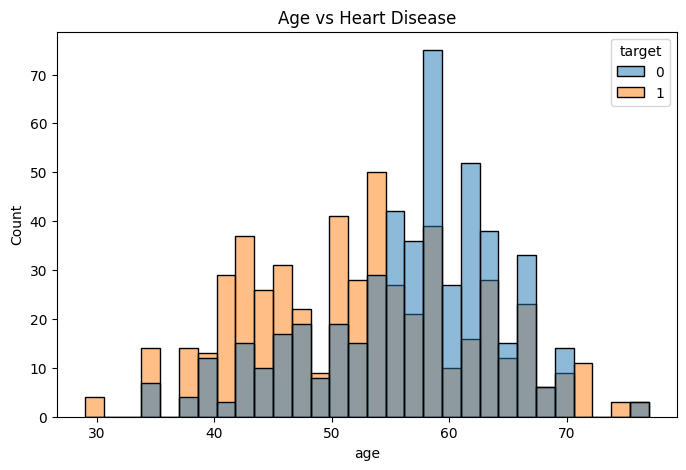

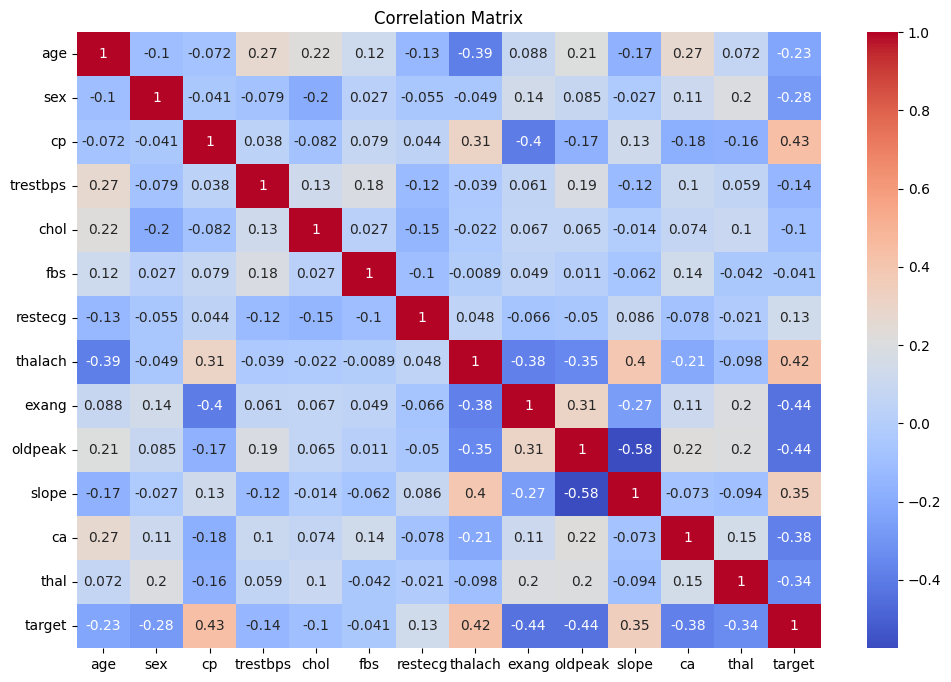

Accuracy Random Forest: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



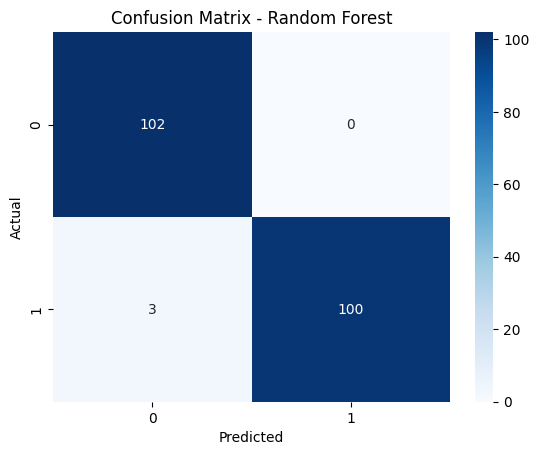

['scaler.pkl']

In [2]:
# ===============================
# 1) IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  

# ===============================
# 2) LOAD DATASET
# ===============================
df = pd.read_csv("heart.csv")
print(df.head())

# ===============================
# 3) EDA
# ===============================
print(df.info())
print(df.describe())

sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='target', bins=30)
plt.title("Age vs Heart Disease")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# ===============================
# 4) PREPROCESSING
# ===============================
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# 5) TRAIN MODELS
# ===============================
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)

#Random Forest
rf_model = models["Random Forest"]

# ===============================
# 6) EVALUATION
# ===============================
y_pred = rf_model.predict(X_test)
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================
# 7) scaler
# ===============================
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")




In [4]:
# ===============================
# 8) USER UPLOAD PATIENT FILE
# ===============================
file_path = input("📁 Please enter the patient file name (CSV or Excel): ")

# Read the file
if file_path.endswith(".xlsx") or file_path.endswith(".xls"):
    patient_df = pd.read_excel(file_path)
elif file_path.endswith(".csv"):
    patient_df = pd.read_csv(file_path)
else:
    raise ValueError("❌ Unsupported file type. Please use CSV or Excel")

# Drop target column if exists
if 'target' in patient_df.columns:
    patient_df = patient_df.drop('target', axis=1)
    print("⚠️ 'target' column was removed automatically")

# Required columns
required_columns = [
    'age','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal'
]

# Check for missing columns
missing_cols = set(required_columns) - set(patient_df.columns)
if missing_cols:
    raise ValueError(f"❌ Missing columns in the file: {missing_cols}")

# Reorder columns to match training data
patient_df = patient_df[required_columns]

# Load the model and scaler from disk
rf_model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Apply scaler and make predictions
X_patient = scaler.transform(patient_df)
predictions = rf_model.predict(X_patient)

# Display results
print("\n🩺 Diagnosis Results:")
for i, pred in enumerate(predictions):
    if pred == 1:
        print(f"🫀 Patient #{i+1}: Heart disease detected (preliminary diagnosis)")
    else:
        print(f"✅ Patient #{i+1}: No heart disease detected (preliminary diagnosis)")



🩺 Diagnosis Results:
🫀 Patient #1: Heart disease detected (preliminary diagnosis)


## Conclusion

This project demonstrates the use of machine learning to provide **preliminary heart disease predictions**.  
The Random Forest model achieved strong accuracy on the dataset and can classify new patients reliably.

By allowing users to upload their patient data (CSV or Excel), this tool makes ML-powered predictions **accessible and user-friendly** for healthcare applications.

> ⚠️ Note: This is a **preliminary diagnostic tool**. It should **not replace professional medical advice**. Always consult a healthcare professional for clinical diagnosis.

## Author: Lilian Alhalabi